<a href="https://colab.research.google.com/github/OODA-OPS/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_Final_Assignment_Jason_Meil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/OODA-OPS/IBM-Data-Science-Professional-Certificate/master/6.%20Data%20Visualization/Final%20Assignment/Data_Science_Topics_Survey.csv')

In [3]:
df.head(3)

,Timestamp,What's your level of interest for the following areas of Data Science? [Data Visualization],What's your level of interest for the following areas of Data Science? [Machine Learning],What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics],What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)],What's your level of interest for the following areas of Data Science? [Data Journalism],What's your level of interest for the following areas of Data Science? [Deep Learning]
0,2017/10/17 1:11:52 PM MDT,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,2017/10/17 2:26:07 PM MDT,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,2017/10/17 2:37:08 PM MDT,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested


# Problem 1

In [4]:
df.drop(columns='Timestamp', axis = 0, inplace = True)
df.rename(columns=lambda x: x.split('[')[-1][:-1], inplace=True)
df.head()

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop),Data Journalism,Deep Learning
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [0]:
result = df.transpose()
result['Not interested'] = np.sum(result == 'Not interested', axis = 1)
result['Somewhat interested'] = np.sum(result == 'Somewhat interested', axis = 1)
result['Very interested'] = np.sum(result == 'Very interested', axis = 1)

In [0]:
result.drop(result.columns[:-3],axis=1,inplace=True)

In [7]:
result.sort_index()

,Not interested,Somewhat interested,Very interested
Big Data (Spark / Hadoop),127,729,1332
Data Analysis / Statistics,60,444,1688
Data Journalism,610,1081,429
Data Visualization,102,734,1340
Deep Learning,136,770,1263
Machine Learning,74,477,1629


# Problem 2

In [0]:
result = result.sort_index(axis=1, ascending=False)

In [0]:
result = result.sort_values('Very interested', ascending=False)

In [10]:
result = result / len(df) * 100
result.round(2)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


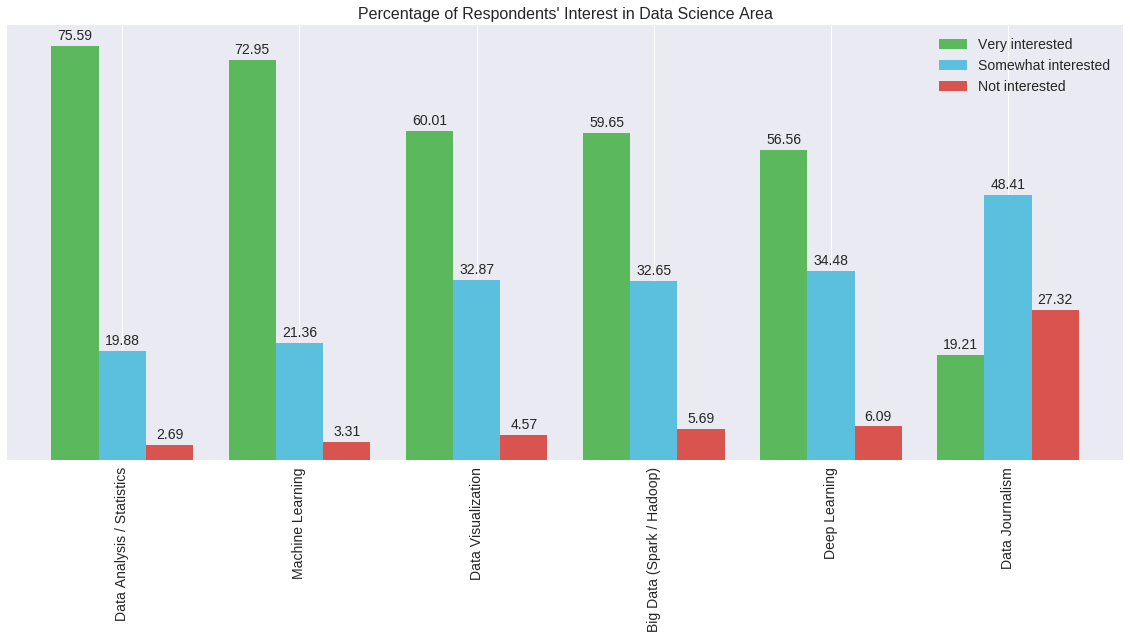

In [11]:
ax = result.plot(kind='bar', 
            figsize=(20, 8), 
            width=0.8, 
            color=['#5cb85c', '#5bc0de', '#d9534f'],
           )

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Area", fontsize=16)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

# Problem 3

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/OODA-OPS/IBM-Data-Science-Professional-Certificate/master/6.%20Data%20Visualization/Final%20Assignment/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [13]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [14]:
a = df.PdDistrict.value_counts()
result = pd.DataFrame(data=a.values, index=a.index, columns=['Count'])
result = result.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])
result = result.reset_index()
result.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
result

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


# Problem 4

In [0]:
SF_geo = r'https://raw.githubusercontent.com/OODA-OPS/IBM-Data-Science-Professional-Certificate/master/6.%20Data%20Visualization/Final%20Assignment/san-francisco.geojson'

In [0]:
import folium

In [0]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [28]:
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
sanfran_map.choropleth(
    geo_str=SF_geo,
    
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sanfran_map